In [1]:
!pip install pipreqs

In [2]:
# Install the googletrans module
%pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=edcd84f6d8a14a914d3f1cdf61707f2c3548d1d06a9b89ab62fb47001851815d
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfram

In [3]:
pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [4]:
pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


In [5]:
pip install textblob

In [6]:
pip install translate

In [7]:
pip install wordcloud

In [8]:
from google_play_scraper import Sort, reviews
from google_play_scraper import app
import pandas as pd
import re
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from wordcloud import WordCloud
import nltk

In [9]:
# Pastikan Anda sudah mendownload resource nltk yang dibutuhkan
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
# 1. Scraping data review Duolingo dari Play Store
result, _ = reviews(
    'com.duolingo',
    lang='id',  # Mengambil review dalam bahasa Indonesia dan Inggris
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=4000
)

In [ ]:
# Memuat data
data = pd.read_csv('/content/duolingo_reviews.csv', encoding='MacRoman')

# Menampilkan beberapa baris pertama
print(data.head(10))

                               reviewId                userName  \
0  d0ca53e0-4f0a-4f7e-9eb0-a113faccdf0b              Winter Fox   
1  0f6b0945-b0d9-46cd-b472-15e40b381cc4   Baliji Muthyala naidu   
2  060f0f79-6c40-4045-bbbb-886ef6394f67           John Stephano   
3  49af61fa-5175-46cf-8b63-c354009cd872          honors ofkings   
4  d5f6f9f1-3d12-4ca8-b99e-76c2d0cdaa95          Mizanur Rahman   
5  c7249bce-dfb5-4935-a75a-6e169f67bc97            Nitish Kumar   
6  27e7f4d0-4d3b-405d-b29c-423e69ba0937           Aydan Devotta   
7  b5ef9c8d-51eb-437e-9ea0-c24f63b36942         Rajshree Pathak   
8  bdab3f50-6bb5-4765-a04f-1c941b8c7698          Arsalan Farman   
9  b7c3ed44-fd03-4044-8604-d4750b6a69e4  Narendra Singh Ranawat   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a/ACg8oc...   
2  https://play-lh.googleusercontent.com/a/ACg8oc...   
3  https://play-lh.googleusercontent.c

# Bagian Baru

# Bagian Baru

In [ ]:
# Menyimpan ulasan ke dalam DataFrame
data = pd.DataFrame(result)

In [ ]:
# Memilih kolom yang diperlukan
data_reviews = data[['content', 'score']]

In [ ]:
df = pd.DataFrame(np.array(result),columns=['reviews'])
df = df.join(pd.DataFrame(df.pop('reviews').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0cfb9065-a316-4a69-83cb-fb6072e6a9cf,Auni Cahya,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka aplikasi Duolingo karena membantu ba...,4,25,6.4.5,2024-10-30 23:57:04,None,None,6.4.5
1,cd242d14-313d-4726-96a2-35b5b67398dc,Dony Agung Fitriyadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Awal awal emang sedikit iklan tapi lama kelama...,1,9,6.5.3,2024-11-04 14:25:25,None,None,6.5.3
2,946f8677-4768-466e-b4f8-232911d94751,Syukurman Nduru,https://play-lh.googleusercontent.com/a-/ALV-U...,Materi belajar dan metodenya bagus dan menarik...,2,2,6.4.5,2024-11-05 01:43:12,None,None,6.4.5
3,fa3bd275-a55e-4456-b3bc-e92ccf3f2553,Miharu 09,https://play-lh.googleusercontent.com/a-/ALV-U...,Jujur suka banget belajar bahasa kalau pakai D...,5,75,6.4.5,2024-11-03 00:23:41,None,None,6.4.5
4,16c77e81-28c5-4977-87e8-598fcabe1065,Nazwa Aulya,https://play-lh.googleusercontent.com/a/ACg8oc...,kalo mau belajar bahasa rasanya jadi seru dan ...,5,78,6.5.3,2024-11-02 12:41:09,None,None,6.5.3


In [ ]:
# mengubah nama atribute
df = df.rename(columns={'content' : 'ulasan', 'score':'rating'})
# untuk membaca
df.head()

,reviewId,userName,userImage,ulasan,rating,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0cfb9065-a316-4a69-83cb-fb6072e6a9cf,Auni Cahya,https://play-lh.googleusercontent.com/a/ACg8oc...,Saya suka aplikasi Duolingo karena membantu ba...,4,25,6.4.5,2024-10-30 23:57:04,None,None,6.4.5
1,cd242d14-313d-4726-96a2-35b5b67398dc,Dony Agung Fitriyadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Awal awal emang sedikit iklan tapi lama kelama...,1,9,6.5.3,2024-11-04 14:25:25,None,None,6.5.3
2,946f8677-4768-466e-b4f8-232911d94751,Syukurman Nduru,https://play-lh.googleusercontent.com/a-/ALV-U...,Materi belajar dan metodenya bagus dan menarik...,2,2,6.4.5,2024-11-05 01:43:12,None,None,6.4.5
3,fa3bd275-a55e-4456-b3bc-e92ccf3f2553,Miharu 09,https://play-lh.googleusercontent.com/a-/ALV-U...,Jujur suka banget belajar bahasa kalau pakai D...,5,75,6.4.5,2024-11-03 00:23:41,None,None,6.4.5
4,16c77e81-28c5-4977-87e8-598fcabe1065,Nazwa Aulya,https://play-lh.googleusercontent.com/a/ACg8oc...,kalo mau belajar bahasa rasanya jadi seru dan ...,5,78,6.5.3,2024-11-02 12:41:09,None,None,6.5.3


In [ ]:
# Cleaning Text
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Hapus URL
    text = re.sub(r'\@\w+|\#', '', text)  # Hapus mention dan hashtag
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.lower()  # Ubah ke huruf kecil
    return text

In [ ]:
# Ganti 'review' dengan nama kolom yang benar jika berbeda
data['cleaned_text'] = data['content'].apply(clean_text)
print(data['cleaned_text'].head().to_markdown())


|    | cleaned_text                                                                                                                                                                                                                                                                                                                                                                 |
|---:|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | saya suka aplikasi duolingo karena membantu banyak orang belajar bahasa asing secara gratis. namun, untuk pelajaran bahasa jepang khususnya di materi "talk about neighbors", beberapa opsi "san" ketika dilisankan justru berbunyi "nii". saya coba 

In [ ]:
# Tokenisasi
data['tokens'] = data['cleaned_text'].apply(word_tokenize)
print(data['tokens'].head().to_markdown())

|    | tokens                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Stopword Removal dan Custom Stopword
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = {'masuk', 'login'}  # Tambahkan kata kustom
all_stopwords = stop_words.union(custom_stopwords)

data['filtered_tokens'] = data['tokens'].apply(lambda x: [word for word in x if word not in all_stopwords])
print(data['filtered_tokens'].head().to_markdown())

|    | filtered_tokens                                                                                                                                                                                                                                                                                                                                                                                              |
|---:|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ['suka', 'aplikasi', 'duolingo', 'membantu', 'orang', 'belajar', 'bahasa', 'asing', 'gratis', '.', ',', 'pelajaran', 'bahasa', 'jepang', 'materi', '``', 'talk', 'about', 'neighbors'

In [ ]:
# Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['stemmed'] = data['filtered_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
print(data['stemmed'].head().to_markdown())

|    | stemmed                                                                                                                                                                                                                                                                                                                                                  |
|---:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | ['suka', 'aplikasi', 'duolingo', 'bantu', 'orang', 'ajar', 'bahasa', 'asing', 'gratis', '', '', 'ajar', 'bahasa', 'jepang', 'materi', '', 'talk', 'about', 'neighbors', '', '', 'opsi', '', 'san', '', 'lisan', 'bunyi', '', 'nii', '', '', 'coba', 'update', 'aplikasi', 'ubah', '', 'tolong

In [ ]:
# Kamus Positif dan Negatif
positive_dict = {
    'baik', 'bagus', 'menyenangkan', 'mudah', 'praktis', 'efektif',
    'menarik', 'berguna', 'keren', 'suka', 'puas', 'cepat',
    'kualitas', 'hebat', 'terbaik', 'inovatif', 'ramah', 'fasilitas'
}

negative_dict = {
    'buruk', 'jelek', 'sulit', 'bingung', 'tidak', 'masalah',
    'kesulitan', 'lambat', 'kekurangan', 'kekecewaan', 'error',
    'login', 'tidak bekerja', 'terganggu', 'bosen', 'kurang',
    'menyebalkan', 'frustrasi', 'berantakan', 'hampir'
}

In [ ]:
# Fungsi untuk Menentukan Sentimen
def sentiment_analysis(row):
    rating = row['score']

    # Menentukan sentimen awal berdasarkan rating
    if rating > 3:
        sentiment = 'positif'
    elif rating < 3:
        sentiment = 'negatif'
    else:
        # Jika rating netral, cek apakah ada kata-kata yang mendukung positif atau negatif
        for word in row['stemmed']:
            if word in positive_dict:
                return 'positif'
            elif word in negative_dict:
                return 'negatif'
        # Jika tidak ada kata positif atau negatif, anggap sentimen netral sebagai 'positif'
        sentiment = 'positif'

    return sentiment

# Menerapkan fungsi sentiment_analysis ke DataFrame
data['sentiment'] = data.apply(sentiment_analysis, axis=1)

In [ ]:
# Menghitung jumlah setiap kategori sentimen
sentiment_counts = data['sentiment'].value_counts()

In [ ]:
# Filter untuk hanya menampilkan sentimen positif dan negatif
filtered_counts = sentiment_counts[sentiment_counts.index.isin(['positif', 'negatif'])]

In [ ]:
# Mencetak hasil
print(filtered_counts.to_markdown())

| sentiment   |   count |
|:------------|--------:|
| positif     |    1872 |
| negatif     |     128 |


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Pisahkan fitur dan label
X = data['cleaned_text']
y = data['sentiment']

In [ ]:
# Ekstraksi fitur dengan TF-IDF
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [ ]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
pip install -U imbalanced-learn

In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribusi kelas setelah SMOTE:
sentiment
positif    1310
negatif    1310
Name: count, dtype: int64


In [ ]:
# # Melatih model dengan Multinomial Naive Bayes
# model = MultinomialNB(alpha=1.0)
# model.fit(X_train, y_train)

In [ ]:
# Melatih model dengan data yang sudah di-resample
model = MultinomialNB(alpha=1.0)
model.fit(X_train_smote, y_train_smote)


MultinomialNB()

In [ ]:
# Memprediksi hasil
y_pred = model.predict(X_test)

In [ ]:
print(data['sentiment'].value_counts())


sentiment
positif    1872
negatif     128
Name: count, dtype: int64


In [ ]:
print(y_pred)


['positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'negatif' 'positif' 'negatif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'posi

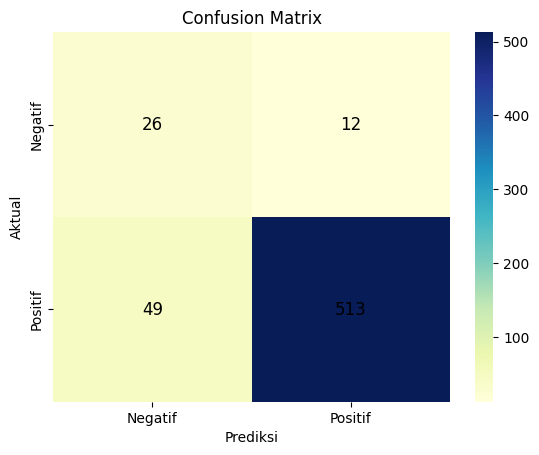

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['negatif', 'positif'])
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'], annot_kws={"size": 12, "color": "black"})
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Menampilkan laporan klasifikasi
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.35      0.68      0.46        38
     positif       0.98      0.91      0.94       562

    accuracy                           0.90       600
   macro avg       0.66      0.80      0.70       600
weighted avg       0.94      0.90      0.91       600



In [ ]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi DataFrame
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

In [ ]:
# Membagi data menjadi data latih (70%) dan data uji (30%)
X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.3, random_state=42)

In [ ]:
# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Menampilkan hasil ekstraksi fitur
features_df

,ada,adalah,agar,aja,akan,aku,anak,apa,apk,aplikasi,...,tidak,tolong,udah,udh,untuk,waktu,walaupun,ya,yang,yg
0,0.124145,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.097666,...,0.272201,0.167764,0.0,0.0,0.095745,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.271772,0.0,0.0,0.000000,0.000000,0.0,0.0,0.229118,0.0
2,0.257835,0.0,0.221226,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.282666,0.000000,0.0,0.0,0.099426,0.202585,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.280383,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.235098,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1996,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1997,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.377987,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1998,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
# Latih Model dengan Naive Bayes
X = data['cleaned_text']
y = data['sentiment']

vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)



In [ ]:
# Menggunakan SMOTE untuk oversampling kelas minoritas
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribusi kelas setelah SMOTE:
sentiment
positif    1496
negatif    1496
Name: count, dtype: int64


In [ ]:
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     negatif       0.36      0.79      0.49        24
     positif       0.99      0.91      0.95       376

    accuracy                           0.90       400
   macro avg       0.67      0.85      0.72       400
weighted avg       0.95      0.90      0.92       400



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
# Membagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting Data
X = data['cleaned_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Pisahkan data menjadi fitur dan label (sentimen)
X = data['cleaned_text']
y = data['sentiment']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,ada,adalah,agar,aja,akan,aku,anak,apa,apk,aplikasi,...,tidak,tolong,udah,udh,untuk,waktu,walaupun,ya,yang,yg
0,0.124145,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.097666,...,0.272201,0.167764,0.0,0.0,0.095745,0.000000,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.271772,0.0,0.0,0.000000,0.000000,0.0,0.0,0.229118,0.0
2,0.257835,0.0,0.221226,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.282666,0.000000,0.0,0.0,0.099426,0.202585,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.280383,0.0
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.235098,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1996,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1997,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.377987,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0
1998,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0


In [ ]:
# Ekstraksi Fitur menggunakan CountVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Inisialisasi SMOTE dan terapkan pada data latih
smote = SMOTE(random_state=42)
X_train_smote_vec, y_train_smote_vec = smote.fit_resample(X_train_vec, y_train)

In [ ]:
# Model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote_vec, y_train_smote_vec)
y_pred = nb_model.predict(X_test_vec)

In [ ]:
# Vectorizing the text data using TF-IDF
# Langkah awal - Split data dan ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(data['cleaned_text'])  # Ekstraksi fitur menggunakan TF-IDF
y = data['sentiment']  # Target atau label

In [ ]:
# Membagi data menjadi data latih dan data uji (70:30)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

In [ ]:
# Inisialisasi SMOTE dan terapkan pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
# Inisialisasi model Naive Bayes dan latih model dengan data yang telah di-resample
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [ ]:
# Prediksi pada data uji
y_test_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_test_pred))

Accuracy: 0.85

Classification Report:
              precision    recall  f1-score   support

     negatif       0.31      0.82      0.45        44
     positif       0.98      0.85      0.91       556

    accuracy                           0.85       600
   macro avg       0.65      0.84      0.68       600
weighted avg       0.93      0.85      0.88       600



In [ ]:
# membagi data 70:30

X_train, X_test, y_train, y_test = train_test_split(data['cleaned_text'], data['sentiment'], test_size=0.7, random_state=125)
vectorizer = TfidfVectorizer(max_features=200)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Terapkan SMOTE pada data latih untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)
X_train_smote_tfidf, y_train_smote = smote.fit_resample(X_train_tfidf, y_train)

# Inisialisasi dan pelatihan model Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_smote_tfidf, y_train_smote)

# Prediksi pada data train
y_train_pred = nb_model.predict(X_train_smote_tfidf)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)

# Prediksi pada data test
y_test_pred = nb_model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Menambahkan hasil ulasan klasifikasi ke dataframe
df['hasil_ulasan_klasifikasi_nb'] = nb_model.predict(vectorizer.transform(data['cleaned_text']))

# Matriks kebingungan dan laporan klasifikasi untuk data test
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

# Output hasil
print(f'Accuracy Train: {train_accuracy:.2f}\n')
print(f'Accuracy Test: {test_accuracy:.2f}\n')
print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)

Accuracy Train: 0.94

Accuracy Test: 0.87

Confusion Matrix:
[[  67   26]
 [ 162 1145]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.29      0.72      0.42        93
     positif       0.98      0.88      0.92      1307

    accuracy                           0.87      1400
   macro avg       0.64      0.80      0.67      1400
weighted avg       0.93      0.87      0.89      1400



In [ ]:
# Evaluasi dengan Cross Validation
scores = cross_val_score(model, X_vectorized, y, cv=5)
print('Cross-validation scores:', scores)

Cross-validation scores: [0.9375 0.935  0.9325 0.9325 0.935 ]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install seaborn

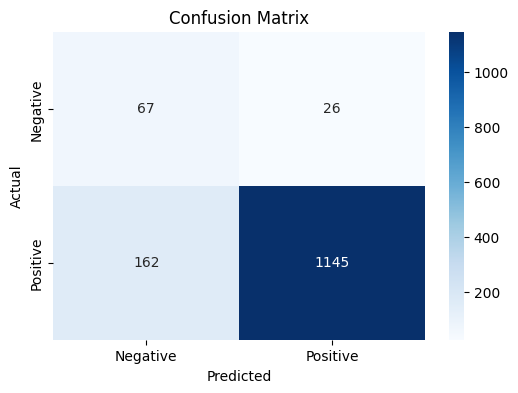

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()  # Menampilkan plot

In [ ]:
print(data['sentiment'].value_counts())

sentiment
positif    1872
negatif     128
Name: count, dtype: int64


In [ ]:
print(y_pred)

['positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif' 'positif'
 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif'
 'positif' 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'negatif' 'negatif' 'positif'
 'positif' 'positif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'negatif' 'positif' 'positif' 'positif'
 'positif' 'negatif' 'positif' 'positif' 'positif' 'positif' 'positif'
 'posi

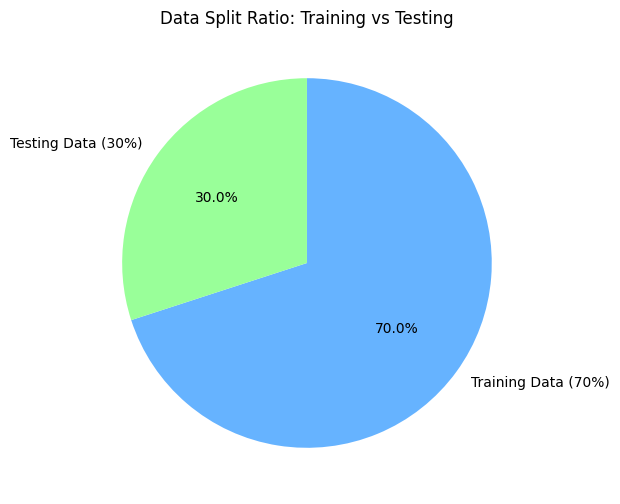

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train and X_test represent 70% and 30% of the data respectively
train_size = 70  # representing 70% of data
test_size = 30   # representing 30% of data

# Preparing data for visualization
sizes = [train_size, test_size]
labels = ['Training Data (70%)', 'Testing Data (30%)']
colors = ['#66b3ff', '#99ff99']

# Creating pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Data Split Ratio: Training vs Testing')
plt.show()

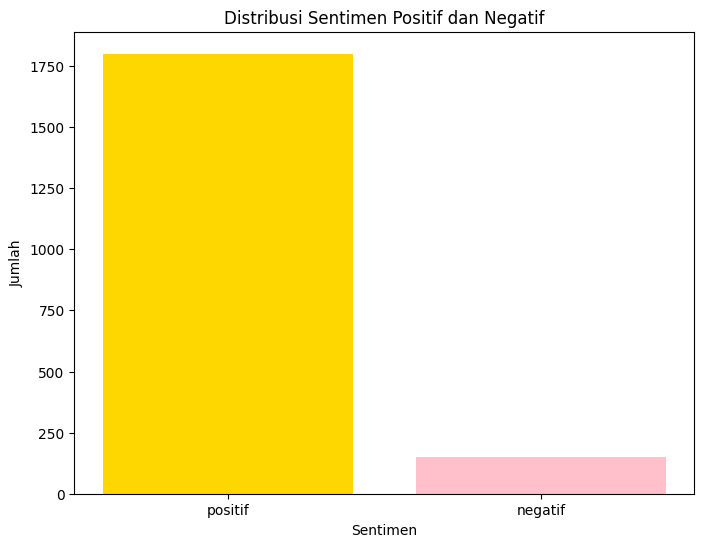

In [ ]:
import matplotlib.pyplot as plt

#ini adalah contoh jumlah sentimen yang telah dihitung
sentiment_counts = {
    'positif': 1800,
    'negatif': 150,
    'netral': 50  # Sentimen netral tidak akan ditampilkan
}

# 1. Pilih hanya sentimen positif dan negatif
filtered_sentiment = {key: sentiment_counts[key] for key in ['positif', 'negatif']}

# 2. Visualisasi - Diagram Batang Sentimen Positif dan Negatif
plt.figure(figsize=(8, 6))
plt.bar(filtered_sentiment.keys(), filtered_sentiment.values(), color=['gold', 'pink'])

# 3. Tambahkan judul dan label
plt.title('Distribusi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')

# 4. Tampilkan plot
plt.show()


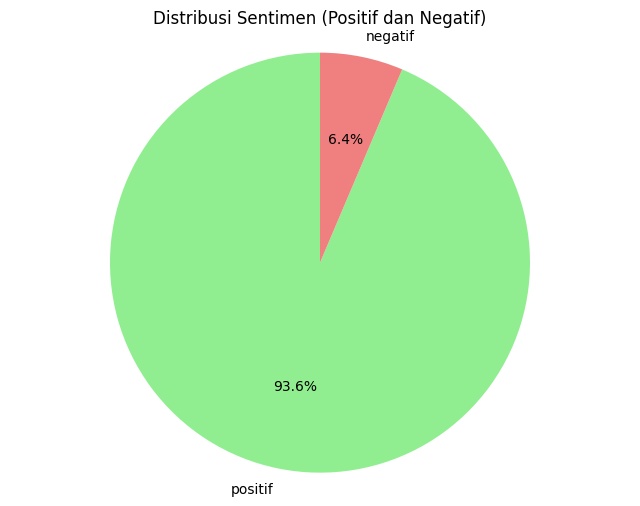

In [ ]:
# Hitung jumlah setiap kategori sentimen
sentiment_counts = data['sentiment'].value_counts()

# Filter untuk hanya menampilkan sentimen positif dan negatif
filtered_sentiment_counts = sentiment_counts[sentiment_counts.index.isin(['positif', 'negatif'])]

# Visualisasi - Diagram Lingkaran (Pie Chart)
plt.figure(figsize=(8, 6))
plt.pie(filtered_sentiment_counts, labels=filtered_sentiment_counts.index, autopct='%1.1f%%',
        startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Distribusi Sentimen (Positif dan Negatif)')
plt.axis('equal')  # Untuk membuat pie chart menjadi lingkaran sempurna
plt.show()

In [ ]:
# Visualisasi Word Cloud
# Gabungkan token menjadi string untuk masing-masing sentimen
positive_text = ' '.join([' '.join(tokens) for tokens in data[data['sentiment'] == 'positif']['stemmed']])
negative_text = ' '.join([' '.join(tokens) for tokens in data[data['sentiment'] == 'negatif']['stemmed']])

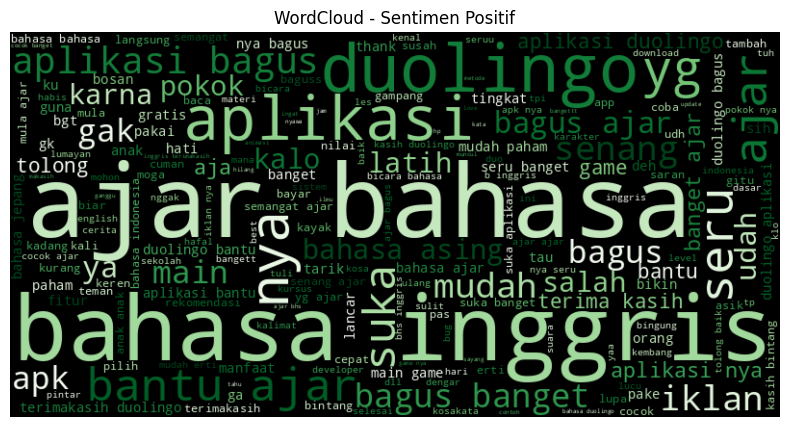

In [ ]:
# Membuat WordCloud untuk sentimen positif
wordcloud_positive = WordCloud(width=800, height=400, background_color='black', colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Positif')
plt.show()

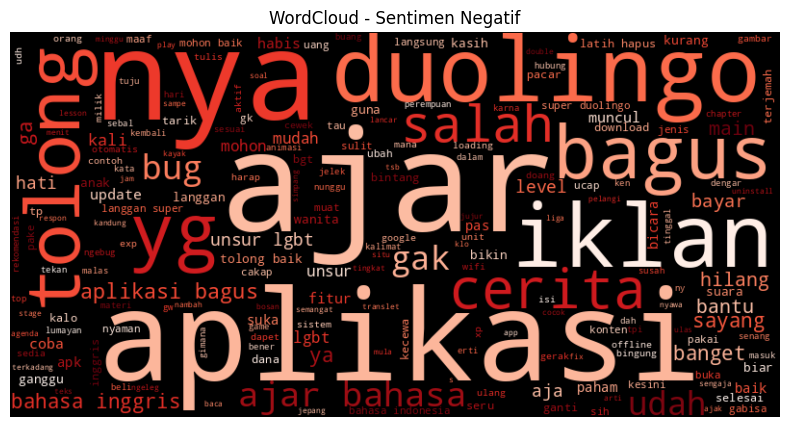

In [ ]:
# Membuat WordCloud untuk sentimen negatif
wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud - Sentimen Negatif')
plt.show()